# Reviews - The 🗡 Nemesis 🗡 of Top Games

---
2007 was an iconic year for smartphones. It was the year that Apple launched the [first iPhone](https://www.businessinsider.com/first-phone-anniversary-2016-12#it-took-three-years-for-apple-to-add-cutcopy-and-paste-7). The iPhone catalyzed the smartphone industry and invited many competitor alternatives. Today, the two biggest operating systems are iOS and Android; iPhones operate on iOS, and most non-iPhones operate on Google's Android operating system. 


With the rise in smartphones and the [dependency of smartphones](https://www.pewresearch.org/internet/fact-sheet/mobile/), mobile apps have quickly became a billion dollar industry by providing information, convenience, and entertainment. Due to the continuously growing and already-substantial industry size, there are lots of compeition and the strive for mobile top charts. There are many metrics that factor into how successful an app is. This case study will specifically dive into the top charts of the Gaming genre and look at their reviews with sentimental analysis using BERT (Bidirectional Encoder Representations from Transformers) NPL (Natural Language Processing).

In [1]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

There are different categories for top charts: free, paid, and gross. Let's grab the top 10 gaming app from each category and put them in a list. These are the top apps as of December 26th, 2020. 

In [2]:
# top charts as of december 26th 

free_app_packages = [
    'com.innersloth.spacemafia',
    'com.pixelbox.roofrails',
    'com.sushirolls.app',
    'com.iec.imposter.solo.kill',
    'com.lebleby.gearrace3d',
    'com.h8games.DoodleRun3D',
    'com.roblox.client',
    'com.constructor.games',
    'com.studio501.jumpdunk',
    'com.mglstudio.boyvsblocks'
]

paid_app_packages = [
    'com.mojang.minecraftpe',
    'com.ninjakiwi.bloonstd6',
    'com.marmalade.monopoly',
    'com.sofarsogood.incredibox',
    'com.chucklefish.stardewvalley',
    'com.aspyr.swkotorii',
    'com.robtopx.geometryjump',
    'com.and.games505.TerrariaPaid',
    'com.scottgames.fivenightsatfreddys',
    'com.clickteam.ultimatecustomnight'
]

gross_app_packages = [
    'com.nianticlabs.pokemongo',
    'com.moonactive.coinmaster',
    'com.roblox.client',
    'com.dts.freefireth',
    'com.king.candycrushsaga',
    'com.miHoYo.GenshinImpact',
    'com.kingsgroup.sos',
    'com.playrix.gardenscapes',
    'com.playrix.homescapes',
    'com.supercell.clashofclans'
]

With the help of `google-play-scraper` package by [JoMingyu](https://github.com/JoMingyu/google-play-scraper), surface app info for each app is obtained. Comments are currently excluded as they will be obtained later on. 

In [3]:
# function to get info for app packages
def get_app_info(app_package, app_info):
    for apps in app_package:
        info = app(apps, lang='en', country='us')
        del info['comments']
        app_info.append(info)

In [4]:
# list to store all app info
free_app_info = []
paid_app_info = []
gross_app_info = []

get_app_info(free_app_packages, free_app_info)
get_app_info(paid_app_packages, paid_app_info)
get_app_info(gross_app_packages, gross_app_info)

---
## Icon Visualization

The incredible vast information accessed by the scraper allows for a nice small visualization of these app icons - one of the crucial things for click-through rates.


In [16]:
# define function to declutter app title for visualization
# remove any title after `:` and `-`
def format_title(title):
    
    # check for `:`
    idx = title.find(':')
    
    # check for `-` if `:` doesn't exist
    if idx == -1:
        idx = title.find('-')
    
    # set the title for all titles with `:` and `-`
    if idx != -1:
        title = title[:idx]
    
    return title

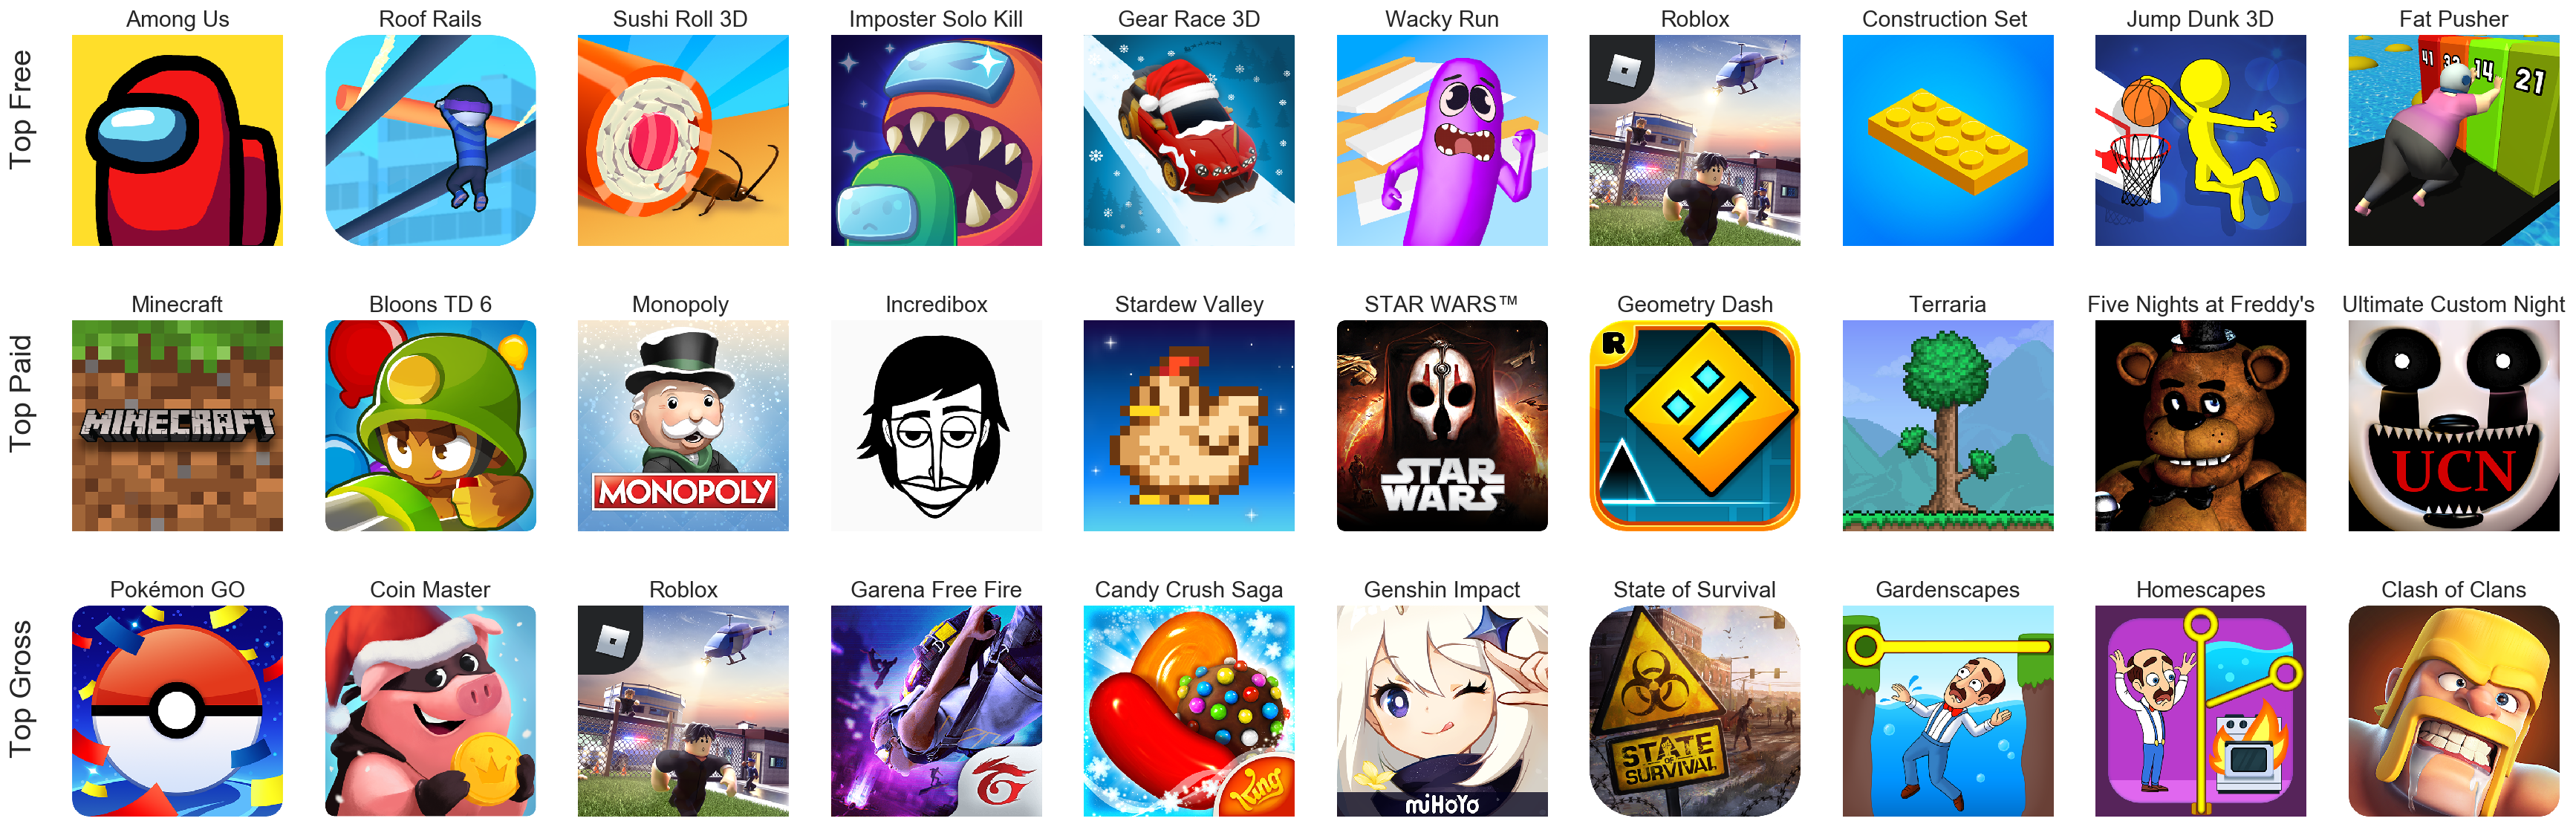

In [17]:
# set up base layer, 3 rows x 10 columns, each row representing each category
fig, axes = plt.subplots(3, (len(free_app_info) + 
                             len(paid_app_info) + 
                             len(gross_app_info)) // 3, 
                               figsize=(30, 10))


for i, ax in enumerate(axes.flat):

    # first row for top free apps
    if i < len(free_app_info):
        
        ai = free_app_info[i]
        img = plt.imread(ai['icon'])
        ax.imshow(img)
        ax.set_title(format_title(ai['title']), size=15)
        
        if i == 0:
            ax.text(-150, 30, 'Top Free', verticalalignment='top',
                   rotation=90, size=20)
   
    # second row for top paid apps
    elif i < (len(free_app_info) + len(paid_app_info)):
        ai = paid_app_info[i - len(free_app_info)]
        img = plt.imread(ai['icon'])
        ax.imshow(img)
        ax.set_title(format_title(ai['title']), size=15)
        
        if i == 10:
            ax.text(-150, 30, 'Top Paid', verticalalignment='top',
                    horizontalalignment='left', rotation=90, size=20)
        
    # third row for top gross apps
    else:
        ai = gross_app_info[i - len(free_app_info) - len(gross_app_info)]
        img = plt.imread(ai['icon'])
        ax.imshow(img)
        ax.set_title(format_title(ai['title']), size=15)
        
        if i == 20:
            ax.text(-150, 30, 'Top Gross', verticalalignment='top',
                    horizontalalignment='left', rotation=90, size=20)
            
    ax.axis('off')

---
## Scraping App Reviews

Reviews and ratings are argubly the most important factors that determine the longevity of successful apps. They also have the ability to persuade or dissuade a potential user from installing the said apps. However, it is important to understand the psychology of user reviews, afterall, they are voluntary. 

[Voluntary Response Bias](https://stattrek.com/statistics/dictionary.aspx?definition=voluntary%20response%20bias#:~:text=In%20survey%20sampling%2C%20voluntary%20response,gun%20control%2C%20etc.):
```
In survey sampling, voluntary response bias occurs when sample members are self-selected volunteers, as in voluntary samples .

An example would be call-in radio shows that solicit audience participation in surveys on controversial topics (abortion, affirmative action, gun control, etc.). The resulting sample tends to overrepresent individuals who have strong opinions.
```

Voluntary response bias can be observed through ratings. The following image is a snapshot of `Imposter Solo Kill`'s rating distribution. Most of the top apps have similarly-looking distributions.  


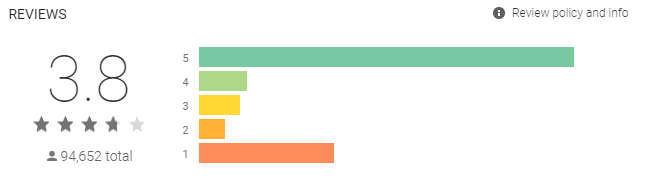

For now this should be okay since the sample reviews taken are equal in sample size. 

Furthermore, the sorting order of reviews are also important especially since only a small sample is being taken. Both `most relevant` and `newest` should be taken into account. 

In [8]:
free_app_reviews = []
paid_app_reviews = []
gross_app_reviews = []

def get_app_reviews(app_packages, review_list):
    for apps in app_packages:
        
        # scrape all ratings 
        for score in range(1, 6):
            
            # scrape both most relevant and newest
            for sort in [Sort.MOST_RELEVANT, Sort.NEWEST]:
                
                # scrape reviews
                app_reviews, _ = reviews(apps, lang='en', country='us',
                                     sort=sort, count=100, 
                                     filter_score_with=score,
                                     continuation_token=None)
                
                # attach app ID and sort info to dict
                for review in app_reviews:
                    review['appID'] = apps
                    
                    if sort == Sort.MOST_RELEVANT:
                        review['sort'] = 'Most Relevant'
                    
                    else: 
                        review['sort'] = 'Newest'
                        
                        
                review_list.extend(app_reviews)

In [9]:
get_app_reviews(free_app_packages, free_app_reviews)
get_app_reviews(paid_app_packages, paid_app_reviews)
get_app_reviews(gross_app_packages, gross_app_reviews)

It's time to convert the app info dictionaries into `.csv` files for further analysis. 

In [10]:
# convert dict to dataframe
free_df = pd.DataFrame(free_app_info)
paid_df = pd.DataFrame(paid_app_info)
gross_df = pd.DataFrame(gross_app_info)

free_review = pd.DataFrame(free_app_reviews)
paid_review = pd.DataFrame(paid_app_reviews)
gross_review = pd.DataFrame(gross_app_reviews)


# convert dataframe to csv
free_df.to_csv('free_app_info.csv', header=True, index=None)
paid_df.to_csv('paid_app_info.csv', header=True, index=None)
gross_df.to_csv('gross_app_info.csv', header=True, index=None)

free_review.to_csv('free_app_review.csv', header=True, index=None)
paid_review.to_csv('paid_app_review.csv', header=True, index=None)
gross_review.to_csv('gross_app_review.csv', header=True, index=None)